In [110]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [111]:
data = pd.read_csv('cardio.csv', sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [113]:
data = data.drop(columns=['id'])

data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [114]:
def detect_outliers_iqr(data, features):
    outliers = []
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)].index
        outliers.extend(outlier_indices)
    return list(set(outliers))

# Fitur-fitur kontinu yang akan diidentifikasi outlier
continuous_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Mendeteksi outlier dalam dataset
outliers_iqr = detect_outliers_iqr(data, continuous_features)

# Menampilkan baris data yang dianggap sebagai outlier
outliers_data = data.loc[outliers_iqr]
print(outliers_data)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
32769  15251       2     180    71.0    160    110            1     1      0   
65539  22585       2     153   111.0    120     80            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
9      19834       1     164    68.0    110     60            1     1      0   
65547  21221       1     163    88.0     90     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
32733  21129       2     164    70.0     70    100            1     1      0   
32746  14562       2     167    65.0     90     60            1     1      1   
65516  18920       1     156    70.0    180     90            2     3      0   
32750  20259       1     152    53.0    152     53            1     1      0   
65523  21193       2     164    78.0    180     90            1     1      0   

       alco  active  cardio  
32769    

In [115]:
# Menghapus baris yang mengandung outlier dari dataframe
data2 = data.drop(outliers_iqr)

# Menampilkan dataframe setelah penghapusan outlier
print(data2)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
5      21914       1     151    67.0    120     80            2     2      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69993  19699       1     172    70.0    130     90            1     1      0   
69994  21074       1     165    80.0    150     80            1     1      0   
69995  19240       2     168    76.0    120     80            1     1      1   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio  
0        

In [116]:
# sum of duplicated values in the DataFrame
data2.duplicated(keep=False).sum()

48

In [117]:
data_cleaned = data2.drop_duplicates()

In [118]:
# Memeriksa nilai yang di luar dari 0 atau 1 pada fitur biner
binary_features = ['smoke', 'alco', 'active', 'cardio']
for feature in binary_features:
    outlier_indices = data_cleaned[~data_cleaned[feature].isin([0, 1])].index
    if len(outlier_indices) > 0:
        print(f"Outlier ditemukan pada fitur {feature}:")
        print(data_cleaned.loc[outlier_indices])
    else:
        print(f"Tidak ada outlier pada fitur {feature}.")

Tidak ada outlier pada fitur smoke.
Tidak ada outlier pada fitur alco.
Tidak ada outlier pada fitur active.
Tidak ada outlier pada fitur cardio.


In [119]:
data_cleaned.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [120]:
# Convert age from days to years
data_cleaned['age_years'] = round(data_cleaned['age'] / 365.25)

# Drop the original 'age' column
data_cleaned.drop(columns=['age'], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_24352\3984421960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['age_years'] = round(data_cleaned['age'] / 365.25)
C:\Users\User\AppData\Local\Temp\ipykernel_24352\3984421960.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(columns=['age'], inplace=True)


In [121]:
data_cleaned.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,2,169,82.0,150,100,1,1,0,0,1,1,48.0
5,1,151,67.0,120,80,2,2,0,0,0,0,60.0


In [122]:
# feature reduction
data_cleaned['height_meter'] = data_cleaned['height'] / 100
data_cleaned['weight_kg'] = data_cleaned['weight'].astype(int)

# renaming features
data_cleaned = data_cleaned.rename(columns={
    'ap_hi': 'systolic_blood_pressure',
    'ap_lo': 'diastolic_blood_pressure',
    'cholesterol': 'cholesterol_level',
    'gluc': 'glucose_level',
    'alco': 'alcohol_intake',
    'cardio': 'cardiovascular_illness'
})

data_cleaned.head()

C:\Users\User\AppData\Local\Temp\ipykernel_24352\518021426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['height_meter'] = data_cleaned['height'] / 100
C:\Users\User\AppData\Local\Temp\ipykernel_24352\518021426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['weight_kg'] = data_cleaned['weight'].astype(int)


,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol_level,glucose_level,smoke,alcohol_intake,active,cardiovascular_illness,age_years,height_meter,weight_kg
0,2,168,62.0,110,80,1,1,0,0,1,0,50.0,1.68,62
1,1,156,85.0,140,90,3,1,0,0,1,1,55.0,1.56,85
2,1,165,64.0,130,70,3,1,0,0,0,1,52.0,1.65,64
3,2,169,82.0,150,100,1,1,0,0,1,1,48.0,1.69,82
5,1,151,67.0,120,80,2,2,0,0,0,0,60.0,1.51,67


In [123]:
df_copy = data_cleaned.copy()
df_copy['body_mass_index'] = ((df_copy['weight_kg']) / ((df_copy['height_meter']) ** 2)).round().astype(int)

df_copy.drop(columns=['height','weight',], inplace=True)#'height_meter','weight_kg'], inplace=True)
df_copy.sample(n=5)

,gender,systolic_blood_pressure,diastolic_blood_pressure,cholesterol_level,glucose_level,smoke,alcohol_intake,active,cardiovascular_illness,age_years,height_meter,weight_kg,body_mass_index
19136,2,120,80,1,1,0,0,1,1,64.0,1.75,72,24
37196,2,140,90,3,3,0,0,1,1,50.0,1.68,86,30
49140,1,140,90,1,1,0,0,1,1,65.0,1.63,72,27
20245,2,150,100,3,1,0,0,1,1,54.0,1.64,68,25
20931,1,150,90,2,1,0,0,1,1,65.0,1.65,63,23


In [124]:
# Memisahkan fitur (X) dan target (y)
X = df_copy.drop(['cardiovascular_illness', 'height_meter', 'weight_kg'], axis=1)  # Fitur
y = df_copy['cardiovascular_illness']  # Target

# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran dataset hasil split
print(f'Ukuran data training: {X_train.shape}')
print(f'Ukuran data testing: {X_test.shape}')

Ukuran data training: (49982, 10)
Ukuran data testing: (12496, 10)


In [125]:
from sklearn.preprocessing import StandardScaler

# Kolom yang akan di-scaling
scaling_columns = ['systolic_blood_pressure', 'diastolic_blood_pressure', 'age_years', 'body_mass_index']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fitting dan transformasi pada data training
X_train[scaling_columns] = scaler.fit_transform(X_train[scaling_columns])

# Transformasi pada data testing menggunakan parameter yang sama dengan data training
X_test[scaling_columns] = scaler.transform(X_test[scaling_columns])

# Menampilkan ukuran dataset hasil split
print(f'Ukuran data training: {X_train.shape}')
print(f'Ukuran data testing: {X_test.shape}')

Ukuran data training: (49982, 10)
Ukuran data testing: (12496, 10)


In [126]:
# Menampilkan semua kolom dari DataFrame X_train setelah penskalaan
print("Data Training setelah penskalaan:")
X_train.head()

Data Training setelah penskalaan:


,gender,systolic_blood_pressure,diastolic_blood_pressure,cholesterol_level,glucose_level,smoke,alcohol_intake,active,age_years,body_mass_index
45081,1,-1.150447,-0.224376,1,1,0,0,0,-1.396011,-0.245350
1035,1,-1.150447,-0.224376,3,3,0,0,1,0.682432,1.503926
45066,2,2.343280,2.376384,1,1,0,0,1,-1.396011,-0.245350
45685,2,-0.451702,-1.524755,1,1,0,0,0,-0.950630,-0.464010
32870,2,1.644534,1.076004,2,1,0,0,1,0.682432,-0.682669


In [127]:
# Menampilkan semua kolom dari DataFrame X_test setelah penskalaan
print("Data Testing setelah penskalaan:")
X_test.head()

Data Testing setelah penskalaan:


,gender,systolic_blood_pressure,diastolic_blood_pressure,cholesterol_level,glucose_level,smoke,alcohol_intake,active,age_years,body_mass_index
29151,2,-0.451702,-0.224376,1,1,0,0,1,0.088591,-0.682669
7329,1,-1.150447,-1.524755,1,1,0,0,0,-1.692931,-1.119988
14107,2,-0.451702,1.076004,1,1,0,0,1,-0.208329,0.847948
59651,2,-1.150447,-1.524755,1,1,0,0,0,1.573193,0.191969
62657,1,-0.451702,-0.224376,3,3,0,0,1,0.830892,-1.119988


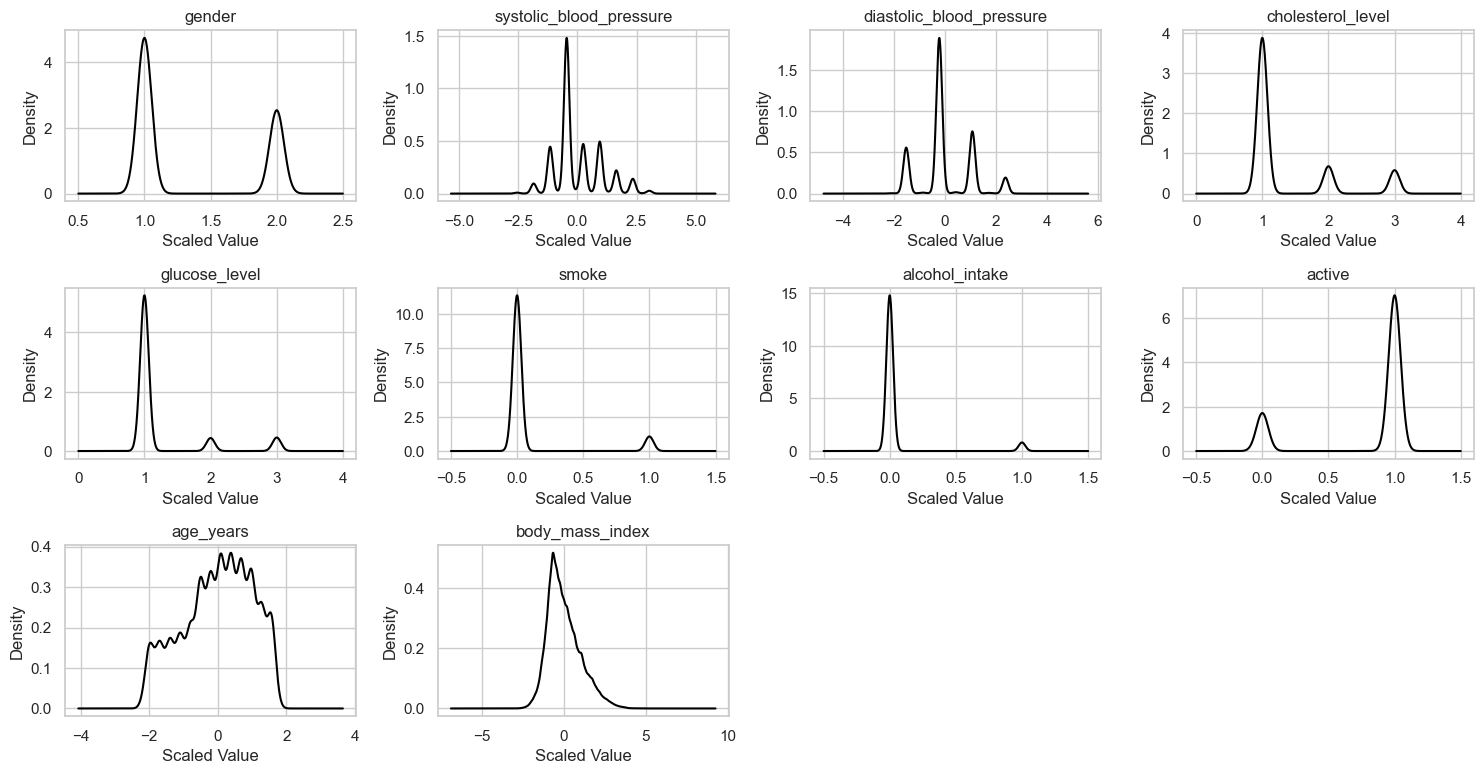

In [128]:
plt.figure(figsize=(15, 10))
for ii, name in enumerate(X_train.columns):
    plt.subplot(4, 4, ii + 1) 
    X_train[name].plot(kind='density', color='black', label=name)
    plt.title(name)
    plt.xlabel('Scaled Value')
    plt.ylabel('Density')

plt.tight_layout()  
plt.show()

In [129]:
from sklearn.feature_selection import mutual_info_classif

# Menghitung skor informasi mutual antara setiap fitur dan target
mutual_info_scores = mutual_info_classif(X_train, y_train)

# Membuat DataFrame untuk menyimpan skor fitur
feature_scores_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual Information Score': mutual_info_scores})

# Mengurutkan DataFrame berdasarkan skor informasi mutual secara menurun
feature_scores_df = feature_scores_df.sort_values(by='Mutual Information Score', ascending=False)

print(feature_scores_df)

                    Feature  Mutual Information Score
1   systolic_blood_pressure                  0.110212
2  diastolic_blood_pressure                  0.064099
8                 age_years                  0.030938
3         cholesterol_level                  0.024394
9           body_mass_index                  0.017859
7                    active                  0.006611
4             glucose_level                  0.005083
5                     smoke                  0.001350
0                    gender                  0.001333
6            alcohol_intake                  0.000000


C:\Users\User\AppData\Local\Temp\ipykernel_24352\3130016224.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information Score', y='Feature', data=feature_scores_df, palette='magma', hue=None, legend=False)


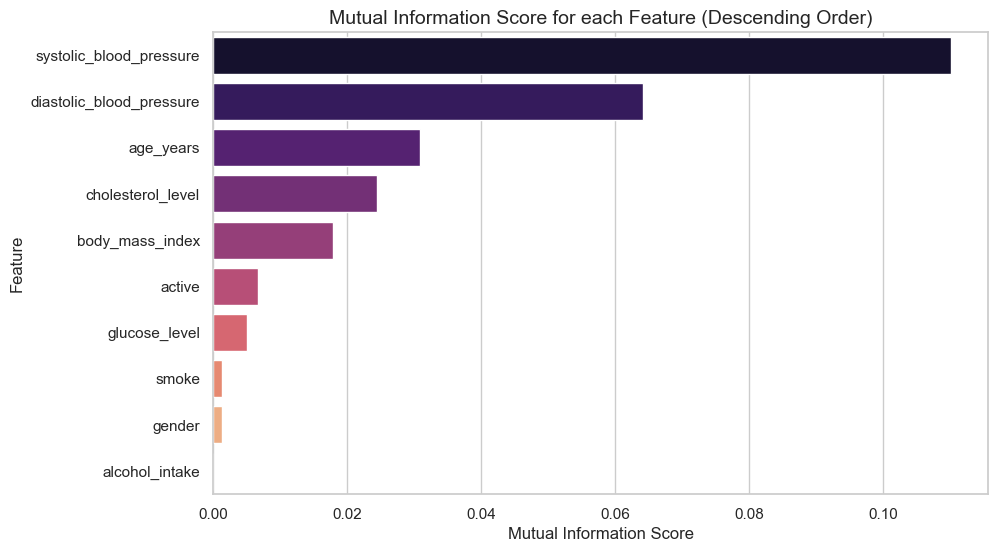

In [130]:
# Atur gaya plot
sns.set(style="whitegrid")

# Plot bar horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information Score', y='Feature', data=feature_scores_df, palette='magma', hue=None, legend=False)

# Atur judul dan label sumbu
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Mutual Information Score for each Feature (Descending Order)', fontsize=14)

# Tampilkan plot
plt.show()

In [131]:
from sklearn import svm

# Inisialisasi model SVM
svm_model = svm.SVC(random_state=1)

# Melatih model pada data training
svm_model.fit(X_train, y_train)

y_train_pred_svm = svm_model.predict(X_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluasi akurasi pada data training
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
print("SVM Training Accuracy:", accuracy_train_svm)

# Evaluasi akurasi pada data testing
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Testing Accuracy:", accuracy_svm)

# Evaluasi metrik lainnya untuk data testing
class_report_svm = classification_report(y_test, y_pred_svm, target_names=["Class 0", "Class 1"])
print("Classification Report SVM:\n", class_report_svm)


SVM Training Accuracy: 0.728782361650194
SVM Testing Accuracy: 0.7361555697823303
Classification Report SVM:
               precision    recall  f1-score   support

     Class 0       0.72      0.80      0.76      6432
     Class 1       0.76      0.66      0.71      6064

    accuracy                           0.74     12496
   macro avg       0.74      0.73      0.73     12496
weighted avg       0.74      0.74      0.73     12496



In [132]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
lr_model = LogisticRegression(random_state=1, max_iter=1000)

# Melatih model pada data training
lr_model.fit(X_train, y_train)

y_train_pred_lr = lr_model.predict(X_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluasi akurasi pada data training
accuracy_train_lr = accuracy_score(y_train, y_train_pred_lr)
print("Logistic Regression Training Accuracy:", accuracy_train_lr)

# Evaluasi akurasi pada data testing
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Testing Accuracy:", accuracy_lr)

# Evaluasi metrik lainnya untuk data testing
class_report_lr = classification_report(y_test, y_pred_lr, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", class_report_lr)


Logistic Regression Training Accuracy: 0.7222800208074907
Logistic Regression Testing Accuracy: 0.7300736235595391
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.71      0.79      0.75      6432
     Class 1       0.75      0.66      0.70      6064

    accuracy                           0.73     12496
   macro avg       0.73      0.73      0.73     12496
weighted avg       0.73      0.73      0.73     12496



In [133]:
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=1)

# Melatih model pada data training
gb_model.fit(X_train, y_train)

y_train_pred_gb = gb_model.predict(X_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluasi akurasi pada data training
accuracy_train_gb = accuracy_score(y_train, y_train_pred_gb)
print("Gradient Boosting Training Accuracy:", accuracy_train_gb)

# Evaluasi akurasi pada data testing
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Testing Accuracy:", accuracy_gb)

# Evaluasi metrik lainnya untuk data testing
class_report_gb = classification_report(y_test, y_pred_gb, target_names=["Class 0", "Class 1"])
print("Classification Report Gradient Boosting:\n", class_report_gb)

Gradient Boosting Training Accuracy: 0.7308230963146732
Gradient Boosting Testing Accuracy: 0.7388764404609475
Classification Report Gradient Boosting:
               precision    recall  f1-score   support

     Class 0       0.73      0.79      0.76      6432
     Class 1       0.75      0.69      0.72      6064

    accuracy                           0.74     12496
   macro avg       0.74      0.74      0.74     12496
weighted avg       0.74      0.74      0.74     12496



In [134]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes
nb_model = GaussianNB()

# Melatih model pada data training
nb_model.fit(X_train, y_train)

y_train_pred_nb = nb_model.predict(X_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluasi akurasi pada data training
accuracy_train_nb = accuracy_score(y_train, y_train_pred_nb)
print("Naive Bayes Training Accuracy:", accuracy_train_nb)

# Evaluasi akurasi pada data testing
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Testing Accuracy:", accuracy_nb)

# Evaluasi metrik lainnya untuk data testing
class_report = classification_report(y_test, y_pred_nb, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", class_report)

Naive Bayes Training Accuracy: 0.7101756632387659
Naive Bayes Testing Accuracy: 0.7159090909090909
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.69      0.81      0.75      6432
     Class 1       0.75      0.62      0.68      6064

    accuracy                           0.72     12496
   macro avg       0.72      0.71      0.71     12496
weighted avg       0.72      0.72      0.71     12496



In [135]:
from sklearn.neural_network import MLPClassifier

# Inisialisasi model MLPClassifier
mlp_model = MLPClassifier(random_state=1)

# Melatih model pada data training
mlp_model.fit(X_train, y_train)

y_train_pred_mlp = mlp_model.predict(X_train)
y_pred_mlp = mlp_model.predict(X_test)

# Evaluasi akurasi pada data training
accuracy_train_mlp = accuracy_score(y_train, y_train_pred_mlp)
print("MLPClassifier Training Accuracy:", accuracy_train_mlp)

# Evaluasi akurasi pada data testing
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("MLPClassifier Testing Accuracy:", accuracy_mlp)

# Evaluasi metrik lainnya untuk data testing
class_report_mlp = classification_report(y_test, y_pred_mlp, target_names=["Class 0", "Class 1"])
print("Classification Report MLPClassifier:\n", class_report_mlp)


MLPClassifier Training Accuracy: 0.7318634708495059
MLPClassifier Testing Accuracy: 0.7364756722151088
Classification Report MLPClassifier:
               precision    recall  f1-score   support

     Class 0       0.72      0.80      0.76      6432
     Class 1       0.76      0.67      0.71      6064

    accuracy                           0.74     12496
   macro avg       0.74      0.73      0.73     12496
weighted avg       0.74      0.74      0.74     12496



In [136]:
from xgboost import XGBClassifier

# Inisialisasi model XGBoost
xgb_model = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')

# Melatih model pada data training
xgb_model.fit(X_train, y_train)

y_train_pred_xgb = xgb_model.predict(X_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi akurasi pada data training
accuracy_train_xgb = accuracy_score(y_train, y_train_pred_xgb)
print("XGBoost Training Accuracy:", accuracy_train_xgb)

# Evaluasi akurasi pada data testing
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Testing Accuracy:", accuracy_xgb)

# Evaluasi metrik lainnya untuk data testing
class_report_xgb = classification_report(y_test, y_pred_xgb, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", class_report_xgb)

XGBoost Training Accuracy: 0.747769196910888
XGBoost Testing Accuracy: 0.7339148527528809
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.72      0.78      0.75      6432
     Class 1       0.75      0.68      0.71      6064

    accuracy                           0.73     12496
   macro avg       0.74      0.73      0.73     12496
weighted avg       0.74      0.73      0.73     12496



In [137]:
from sklearn.svm import SVC

# Inisialisasi model SVC
svc_model = SVC(random_state=1)

# Melatih model pada data training
svc_model.fit(X_train, y_train)

y_train_pred_svc = svc_model.predict(X_train)
y_pred_svc = svc_model.predict(X_test)

# Evaluasi akurasi pada data training
accuracy_train_svc = accuracy_score(y_train, y_train_pred_svc)
print("SVC Training Accuracy:", accuracy_train_svc)

# Evaluasi akurasi pada data testing
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVC Testing Accuracy:", accuracy_svc)

# Evaluasi metrik lainnya untuk data testing
class_report_svc = classification_report(y_test, y_pred_svc, target_names=["Class 0", "Class 1"])
print("Classification Report SVC:\n", class_report_svc)

SVC Training Accuracy: 0.728782361650194
SVC Testing Accuracy: 0.7361555697823303
Classification Report SVC:
               precision    recall  f1-score   support

     Class 0       0.72      0.80      0.76      6432
     Class 1       0.76      0.66      0.71      6064

    accuracy                           0.74     12496
   macro avg       0.74      0.73      0.73     12496
weighted avg       0.74      0.74      0.73     12496



In [138]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes
nb_model = GaussianNB()

# Melatih model pada data training
nb_model.fit(X_train, y_train)

# Melakukan prediksi pada data training dan data testing
y_train_pred_nb = nb_model.predict(X_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluasi akurasi pada data training dan data testing
accuracy_train_nb = accuracy_score(y_train, y_train_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Cetak akurasi
print("Naive Bayes Training Accuracy:", accuracy_train_nb)
print("Naive Bayes Testing Accuracy:", accuracy_nb)

# Evaluasi metrik lainnya untuk data testing (opsional)
class_report_nb = classification_report(y_test, y_pred_nb, target_names=["Class 0", "Class 1"])
print("Classification Report Naive Bayes:\n", class_report_nb)


Naive Bayes Training Accuracy: 0.7101756632387659
Naive Bayes Testing Accuracy: 0.7159090909090909
Classification Report Naive Bayes:
               precision    recall  f1-score   support

     Class 0       0.69      0.81      0.75      6432
     Class 1       0.75      0.62      0.68      6064

    accuracy                           0.72     12496
   macro avg       0.72      0.71      0.71     12496
weighted avg       0.72      0.72      0.71     12496



In [139]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import classification_report

# Membuat model Sequential
model = Sequential()

# Menambahkan layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout layer untuk mencegah overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Mengompilasi model dengan learning rate yang lebih rendah
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Melatih model dengan lebih banyak epoch
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Akurasi: {accuracy}')

# Prediksi label pada data uji
y_pred_prob = model.predict(X_test)
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Evaluasi model menggunakan classification report
print(classification_report(y_test, y_pred_binary))


Epoch 1/100


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3124/3124 ━━━━━━━━━━━━━━━━━━━━ 3s 731us/step - accuracy: 0.7057 - loss: 0.5834 - val_accuracy: 0.7304 - val_loss: 0.5496
Epoch 2/100
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 2s 704us/step - accuracy: 0.7209 - loss: 0.5647 - val_accuracy: 0.7318 - val_loss: 0.5479
Epoch 3/100
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 2s 735us/step - accuracy: 0.7223 - loss: 0.5586 - val_accuracy: 0.7332 - val_loss: 0.5486
Epoch 4/100
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 2s 712us/step - accuracy: 0.7231 - loss: 0.5565 - val_accuracy: 0.7326 - val_loss: 0.5468
Epoch 5/100
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 2s 720us/step - accuracy: 0.7243 - loss: 0.5579 - val_accuracy: 0.7334 - val_loss: 0.5459
Epoch 6/100
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 2s 703us/step - accuracy: 0.7236 - loss: 0.5576 - val_accuracy: 0.7343 - val_loss: 0.5460
Epoch 7/100
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 2s 721us/step - accuracy: 0.7235 - loss: 0.5527 - val_accuracy: 0.7333 - val_loss: 0.5471
Epoch 8/100
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 2s 693us/step - accuracy: 0.7261 - los

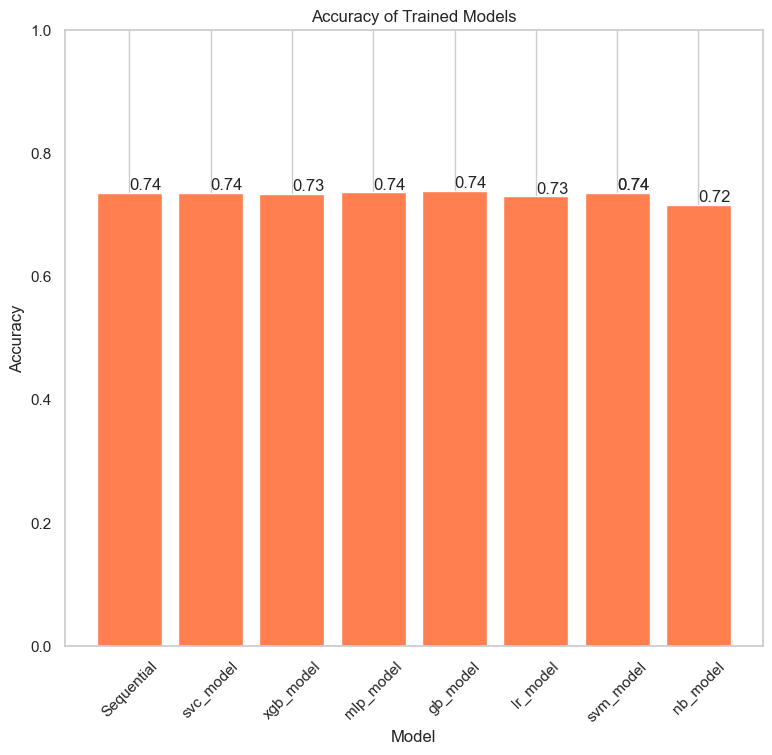

In [140]:
import matplotlib.pyplot as plt

model_names = ['Sequential', 'svc_model', 'xgb_model', 'mlp_model','gb_model','lr_model','svm_model','nb_model', 'svm_model']  
accuracies = [accuracy, accuracy_svc, accuracy_xgb, accuracy_mlp, accuracy_gb, accuracy_lr, accuracy_svm, accuracy_nb, accuracy_svm]  

plt.figure(figsize=(9, 8))
bars = plt.bar(model_names, accuracies, color='coral')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Trained Models')
plt.ylim(0, 1)  
plt.xticks(rotation=45)  
plt.grid(axis='y')  


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.show()


In [141]:
import pickle

# Fitting dan transformasi pada kolom yang di-scaling
X_train[scaling_columns] = scaler.fit_transform(X_train[scaling_columns])

# Simpan scaler ke dalam file pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Memuat scaler dari file pickle
with open('scaler.pkl', 'rb') as f:
    scaler_loaded = pickle.load(f)

In [142]:
# Simpan model ke file .pkl
with open('stream_model.pkl', 'wb') as file:
    pickle.dump(gb_model, file)

In [143]:
filename = 'stream_model.sav'
pickle.dump(gb_model,open(filename, 'wb'))

In [152]:
import pandas as pd

# Misalkan ini adalah data input baru Anda
input_data = {
    'gender': [2],
    'systolic_blood_pressure': [150],
    'diastolic_blood_pressure': [100],
    'cholesterol_level': [1],
    'glucose_level': [1],
    'smoke': [0],
    'alcohol_intake': [0],
    'active': [1],
    'age_years': [48],
    'body_mass_index': [28]
}

# Buat DataFrame dari data input baru
input_data_df = pd.DataFrame(input_data)

# Lakukan prediksi pada data input baru dengan gb_model
predictions = svc_model.predict(input_data_df)

# Tampilkan hasil prediksi
print(predictions)

[1]


In [150]:
# Misalkan ini adalah data input baru Anda
input_data = {
    'gender': [1],
    'systolic_blood_pressure': [120],
    'diastolic_blood_pressure': [80],
    'cholesterol_level': [1],
    'glucose_level': [1],
    'smoke': [0],
    'alcohol_intake': [0],
    'active': [1],
    'age_years': [48],
    'body_mass_index': [28]
}

# Buat DataFrame dari data input baru
input_data_df = pd.DataFrame(input_data)

# Lakukan prediksi pada data input baru dengan gb_model
predictions = svc_model.predict(input_data_df)

# Tampilkan hasil prediksi
print(predictions)

[1]


In [146]:
# Lakukan prediksi pada data input baru
predictions = gb_model.predict(input_data_df)

# Tampilkan hasil prediksi
print(predictions)

[1]
